## *Compulsory Task 1*

This dataset is from the US Arrests Kaggle challenge (link). A description of the
data is given as: “This data set contains statistics, in arrests per 100,000 residents
for assault, murder, and rape in each of the 50 US states in 1973. Also given is the
percent of the population living in urban areas.”
Follow these steps:

    ● Use the dataset ​UsArrests.csv included in this folder to generate a similar in-depth PCA report of the data,
    explore as much as you can, motivate the pre-processing steps you take, and interpret the outcomes of any analyses.
    ● You are also required to do an application of two clustering techniques and an analysis of the clusters they generate.
    ● Push all the work that you have generated for this project to GitHub.

In [1]:
# import necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns

import seaborn as sns
sns.set()  #if you want to use seaborn themes with matplotlib functions
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# import the 'UsArrests.csv' dataset using pandas
arrest_df = pd.read_csv('UsArrests.csv')

### Exploratory Data Analysis

In [2]:
# print the first few rows

arrest_df.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
# Checking the dataset for missing values

arrest_df.isnull().sum()

City        0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [4]:
# Ho the dataset is shaped
arrest_df.shape

(50, 5)

In [5]:
# statistical summary of UsArrests dataset
arrest_df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


---
_The UsArrests dataset consists of 50 rows and 5 columns, after the City column was changed to an index column. It has no missing data._

---
It is a common and good practice to normalize your data before feeding it to any machine learning algorithm.
PCA is a statistical procedure for dimension reduction. It transforms the original variables in a dataset, which might be correlated, into new covariates that are linear combinations of the original variables. These new predictors are uncorrelated and orthogonal to each other. These variables are called principal components (PC).

In [6]:
# copy city column to df
df = arrest_df['City']


In [7]:
arrest_df = arrest_df.drop('City', axis=1)

In [8]:
arrest_df.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [9]:
# Scaling the dataset features and applying the PCA

# scaling the features
scaled = StandardScaler().fit_transform(arrest_df)
scaled = pd.DataFrame(scaled, columns = arrest_df.columns)

In [10]:
# Let's check whether the normalized data has a mean of zero and a standard deviation of one
np.mean(scaled), np.std(scaled)

(Murder     -8.437695e-17
 Assault     1.298961e-16
 UrbanPop   -4.263256e-16
 Rape        8.326673e-16
 dtype: float64,
 Murder      1.0
 Assault     1.0
 UrbanPop    1.0
 Rape        1.0
 dtype: float64)

### Selecting the number of components for PCA

First, the PCA algorithm is going to standardize the input data frame, calculate the covariance matrix of the features.
Now, let’s try to imagine that every value from the covariance matrix is a vector. That vector indicates a direction in the n-dimensional space (n is the number of features in the original data frame). What is a vector? We can imagine that as an “arrow” pointing in some direction in that n-dimensional space. Those vectors can be “averaged” by generating another vector that “points” more or less in the same direction as all of those averaged vectors.

We call it an eigenvector. It also has a value (let’s imagine it as a “length” of the “arrow”) that is correlated with the number of vectors averaged by the eigenvector (the more averaged covariance vectors, the larger the eigenvalue).
After that, we sort the eigenvectors by their eigenvalues. Remember that we have already chosen the cut off point (the desired
variance that is supposed to be explained by the principal components).


It means we can select the eigenvectors which add up to the
desired threshold of explained variance. Now, we multiply the standardized feature data frame by the matrix of principal components, and as a result, we get the compressed representation of the input data.

In [11]:
# Typically, we want the explained variance to be between 95–99%. In Scikit-learn we can set it like this:

# //95% of variance
# from sklearn.decomposition import PCA

pca = PCA(n_components = 0.95)

pca.fit(scaled)

reduced = pca.transform(scaled)

pca = PCA().fit(scaled)

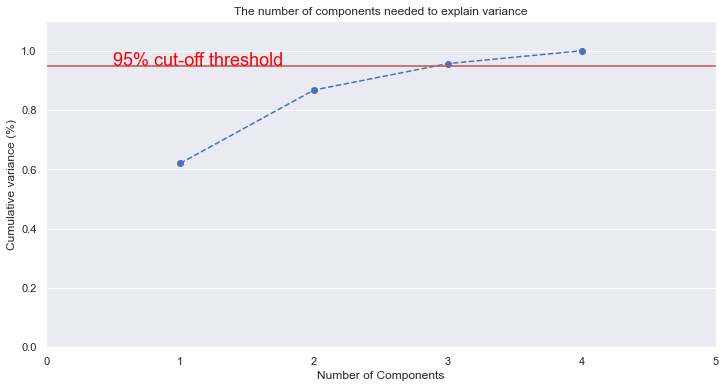

In [12]:
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()

xi = np.arange(1, 5, step=1)

y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0, 1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 6, step=1)) #change from 0-based array index to 1-based human-readable label

plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.95, '95% cut-off threshold', color = 'red', fontsize=18)

ax.grid(axis='x')
plt.show()

In [13]:
#cumsum the explained variance ratio to find how many PCs we should choose
# np.cumsum(pca.explained_variance_ratio_)
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

---

explained_variance_ratio will provides the amount of information or variance each principal component holds
after projecting the data to a lower dimensional subspace.

From the above output, you can observe that the principal component 1 holds 62.006% of the
information, principal component 2 holds 24.744% of information and principal component 3 holds only 8.914% of the information. Also, the other point to note is that while projecting four-dimensional data to a three-dimensional data,
4.336% information was lost.

from the above figure we can notice that the best number of components to be chosen is three, hence 'n_components = 3'

In [14]:
pca = PCA(n_components = 3)

principalComponents = pca.fit_transform(scaled)

principalComponents.shape

(50, 3)

In [15]:
# Create a principalComponents dataframe

PC_df = pd.DataFrame(data = principalComponents, columns = ['Principal Component 1',
                     'Principal Component 2', 'Principal Component 3'])
PC_df['City'] = df

In [16]:
PC_df.head()

,Principal Component 1,Principal Component 2,Principal Component 3,City
0,0.985566,1.133392,-0.444269,Alabama
1,1.950138,1.073213,2.040003,Alaska
2,1.763164,-0.745957,0.054781,Arizona
3,-0.141420,1.119797,0.114574,Arkansas
4,2.523980,-1.542934,0.598557,California


Now we plot the variance explained by each principal component.
The plot of the variance explained is called a scree plot, which is displayed below

<AxesSubplot:title={'center':'Variance Explined by principal components'}, xlabel='Principal Component', ylabel='variance explained'>

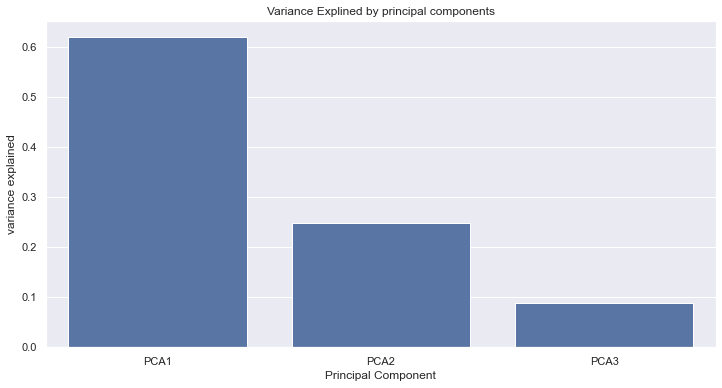

In [17]:
df = pd.DataFrame({'variance explained': pca.explained_variance_ratio_, 'Principal Component': ['PCA1', 'PCA2', 'PCA3']})
plt.title('Variance Explined by principal components')
sns.barplot(x = 'Principal Component', y = 'variance explained', data = df, color = 'b')


In [18]:
pca.explained_variance_

array([2.53085875, 1.00996444, 0.36383998])

In [19]:
np.cumsum(pca.explained_variance_ratio_)

array([0.62006039, 0.86750168, 0.95664248])

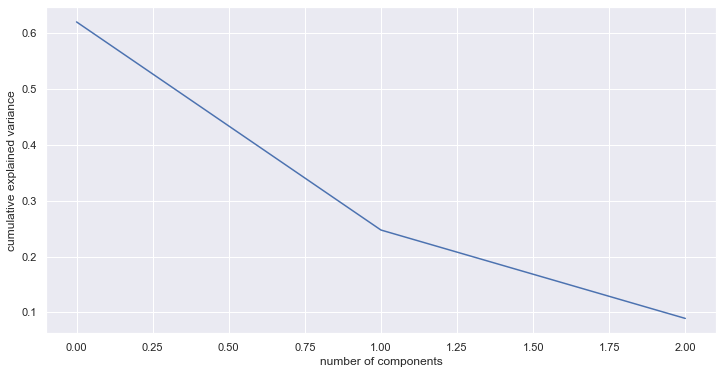

In [20]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()


In [21]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3'], index = arrest_df.columns)
loadings

,PC1,PC2,PC3
Murder,0.535899,0.418181,-0.341233
Assault,0.583184,0.187986,-0.268148
UrbanPop,0.278191,-0.872806,-0.378016
Rape,0.543432,-0.167319,0.817778


We can see for PC1, Rape, Assault and Murder load nearly the same, UrbanPop’s loading is slightly smaller. PC1 approximately does an average to the all original features. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


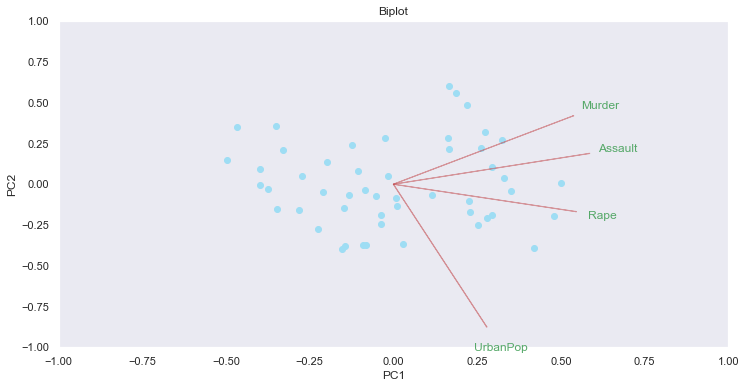

In [35]:
scaled_loc = StandardScaler().fit_transform(arrest_df)
pca = PCA(n_components = 3)
x_new = pca.fit_transform(scaled_loc)

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]), list(scaled.columns))
plt.title("Biplot")
plt.show()

A Biplot is an enhanced scatter plot that uses both points and vectors to represent the dataset’s structure. As used in PCA, the axes of the biplot are a pair of principal components, here we used PC1 and PC2.


### ● You are also required to do an application of two clustering techniques and an analysis of the clusters they generate.
---
#### *K-means Clustering implementation* 

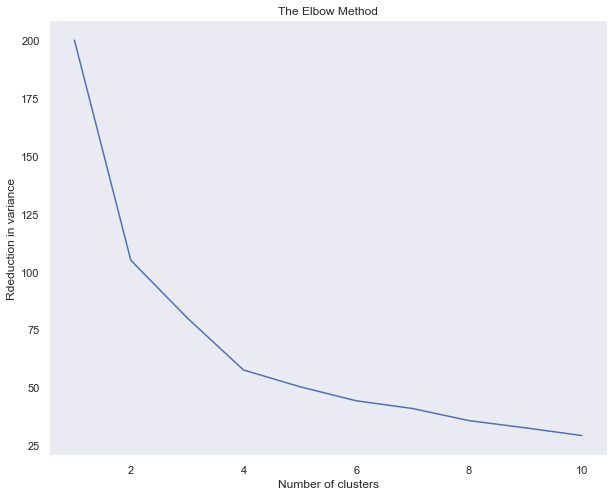

In [23]:
plt.figure(figsize=(10, 8))
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(scaled)
    wcss.append(kmeans.inertia_) #criterion based on which K-means clustering works
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Rdeduction in variance')
plt.grid()

In [24]:
# fitting k-means to the dataset
# 'k-means++' selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.

kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 1 )
ykmeans = kmeans.fit_predict(scaled)
ykmeans

array([1, 0, 0, 1, 0, 0, 3, 3, 0, 1, 3, 2, 0, 3, 2, 3, 2, 1, 2, 0, 3, 0,
       2, 1, 0, 2, 2, 0, 2, 3, 0, 0, 1, 2, 3, 3, 3, 3, 3, 1, 2, 1, 0, 3,
       2, 3, 3, 2, 2, 3])

In [25]:
labels = kmeans.predict(scaled)
centroids = kmeans.cluster_centers_

In [26]:
silhouette_score(scaled, ykmeans)

0.33968891433344395

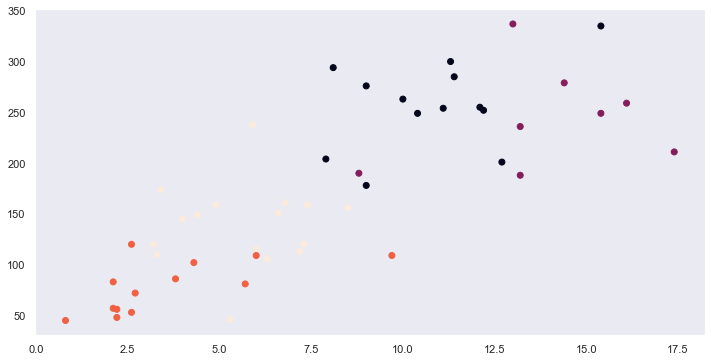

In [27]:
plt.scatter(x = arrest_df['Murder'], y = arrest_df['Assault'], c = ykmeans)
plt.grid()
plt.show()

---
## Agglomarative Clustering Dendrograms

Complete Linkage:

The distance between 2 clusters is defined as the maximum distance between any 2 points in the clusters

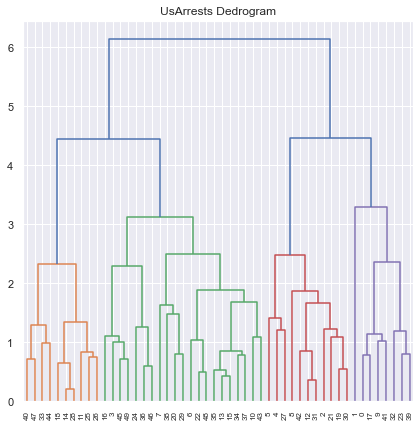

In [28]:
plt.figure(figsize = (7, 7))
plt.title('UsArrests Dedrogram')
dend = shc.dendrogram(shc.linkage(scaled, method = 'complete'))

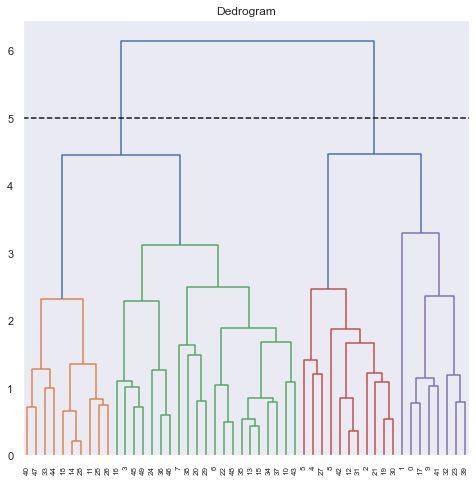

In [29]:
plt.figure(figsize = (8,8))
plt.title('Dedrogram')
z = shc.linkage(scaled, method = 'complete')
dend = shc.dendrogram(z)
plt.axhline(y = 5, color = 'k', linestyle = '--')
plt.grid()
plt.show()

In [30]:
cluster = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'complete')

cluster.fit_predict(scaled)

array([0, 0, 2, 1, 2, 2, 1, 1, 2, 0, 1, 3, 2, 1, 3, 1, 1, 0, 3, 2, 1, 2,
       1, 0, 1, 3, 3, 2, 3, 1, 2, 2, 0, 3, 1, 1, 1, 1, 1, 0, 3, 0, 2, 1,
       3, 1, 1, 3, 1, 1], dtype=int64)

In [31]:
cluster.labels_

array([0, 0, 2, 1, 2, 2, 1, 1, 2, 0, 1, 3, 2, 1, 3, 1, 1, 0, 3, 2, 1, 2,
       1, 0, 1, 3, 3, 2, 3, 1, 2, 2, 0, 3, 1, 1, 1, 1, 1, 0, 3, 0, 2, 1,
       3, 1, 1, 3, 1, 1], dtype=int64)

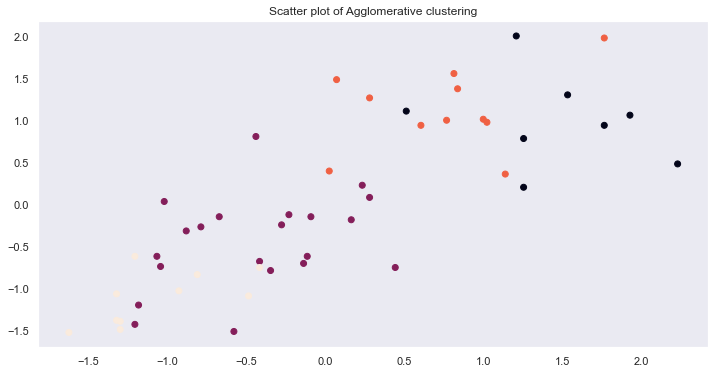

In [32]:
plt.scatter(x = scaled['Murder'], y = scaled['Assault'], c = cluster.labels_)
plt.title('Scatter plot of Agglomerative clustering')
plt.grid()
plt.show()

In [33]:
from sklearn.metrics import silhouette_score
silhouette_score(scaled, cluster.fit_predict(scaled)) 

0.31595507426164543

The above sillhouette score is closer to 1 than to -1. A sillhouette score of 1 means clusters are well apart from each other and clearly distinguished.



## Additional links:

[1] https://github.com/PJalgotrader/ML-USU-SP21/blob/main/Classes/Class%2024-%20PCA%20(Python)/PCA_pca.ipynb

[2] https://www.kaggle.com/akshayreddykotha/us-crime-rate-k-means-clustering

[3] https://www.kaggle.com/aishu2218/us-arrests-using-hierarchical-clustering-analysis

[4] https://towardsdatascience.com/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c

[5] https://www.reneshbedre.com/blog/principal-component-analysis.html

[6] https://jbhender.github.io/Stats506/F17/Projects/G18.html